# Binary Tree Traversal

We'll start with a single node, create two new child nodes for each node in the current row, move to the next row, and repeat the process of creating new child nodes until we have n rows in our tree. Finally, we return the kth nodes in the nth row. 

The tree we will generate is a Perfect Binary Tree with all levels completely filled.

If the current node is 0, its left child will be 0 and the right child will be 1.
Otherwise, if the current node is 1, its left child will be 1 and the right child will be 0.

we can try to perform a binary search-like algorithm where we discard the left or right half of the sub-tree based on the condition where the final target node must be present. Provided this hint, we recommend you stop here and try thinking a bit about how this method will work here.

Consider the case where we need to find the 21st node in the 6th row. 

The number of nodes in the 6th row will be 2^(6-1) = 32
Therefore, the 21st node will be present in the right half of the last row in our current binary tree.
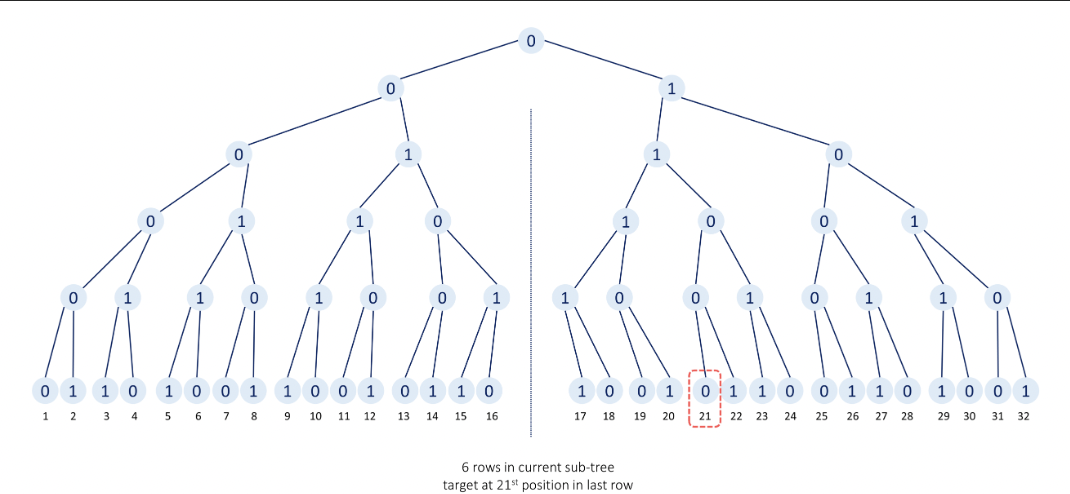

Hence, we can be certain that our target node is not present in the left sub-tree of the current root node. As a result, we can discard the whole left sub-tree. This simplifies our problem to finding the 21−16= 5th node in the last row of the sub-tree of 5th rows.

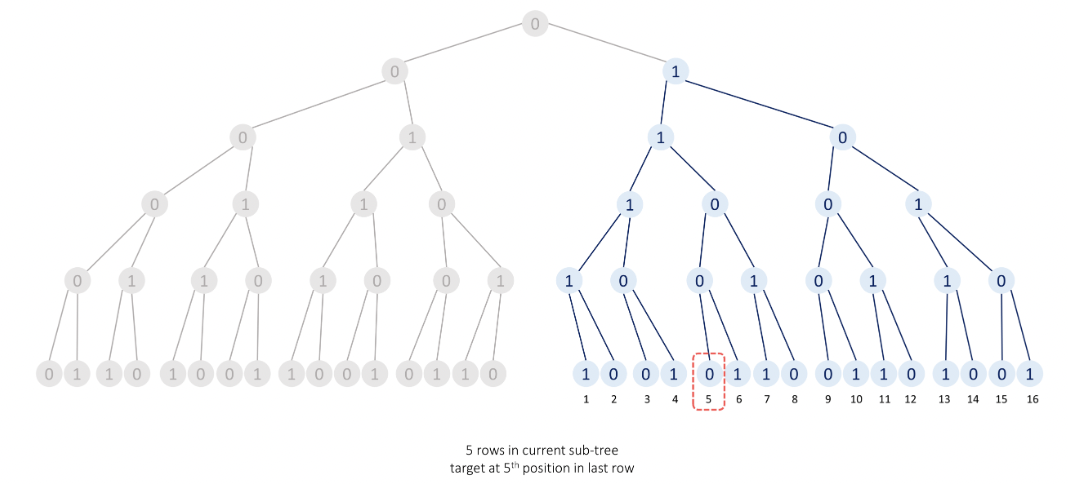

Within this subtree of 5 rows, we have to find the 5th node in the 5th row.
The number of nodes in the 5th row is given by 2^(5−1)=16. Therefore, the 5th node will be present in the left sub-tree and we can discard the right sub-tree, and this time the position of the target node will remain unchanged.

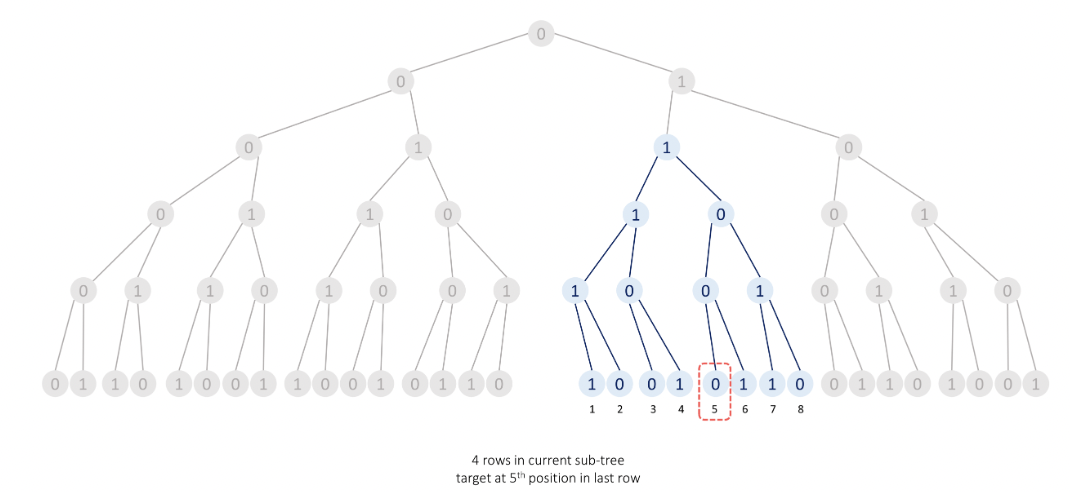

In [ ]:
Now, in this subtree of 111 row, we have to find the 1st node in the 1st row. 
Since this row consists of only one node, the root node will be our target node.

# Algorithm
Create a method depthFirstSearch which takes n number of rows in the current tree, k target node position in the last row, and rootVal current tree's root's value as parameters:

If n is 1, then we will have a single node in our tree and this node is our target node. So, we return its value rootVal.

Find the number of nodes in the last row of the current tree, totalNodes, 2^(n-1).

If the current target node k lies in the left half of the last row of the current subtree (i.e. k <= totalNodes / 2), we will move to the left sub-tree.
If the current node's value rootVal is 0 then the next node's value will be 0, otherwise, the next node's value will be 1.
Return depthFirstSearch(n - 1, k, nextRootVal).

Otherwise, if the current target node k lies in the right half of the last row of the current subtree (i.e. k > totalNodes / 2), we will move to the right sub-tree.
If the current node's value rootVal is 0 then the next node's value will be 1, otherwise, the next node's value will be 0.
Additionally, the target's position will change to (k - (totalNodes / 2)).
Return depthFirstSearch(n - 1, newPosition, nextRootVal).

We return the result returned by calling depthFirstSearch(n, k, 0) with the number of rows as n, target node position k, and root node's value 0.

In [ ]:
class Solution:
    def kthGrammar(self, n: int, k: int) -> int:

        def dfs(row, k, root):
            if row == 1:
                # return 0
                return root # the base case should return the root 
            total_node = 2**(row-1)
            if k <= total_node / 2: 
                # discard right tree, keep the left
                if root == 0:
                    next_root = 0
                else:
                    next_root = 1
                return dfs(row-1, k, next_root)
            if k > total_node / 2: 
                # discard left tree, keep the right
                if root == 1:
                    next_root = 0
                else:
                    next_root = 1
                return dfs(row-1, k-(total_node/2), next_root)
        
        return dfs(n, k, 0)